In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [3]:
# Display 18x18 pixel image.
Image(filename='/content/drive/MyDrive/Colab Notebooks/Open CV and AI/checkerboard_18x18.png')

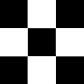

In [5]:
# Display 84x84 pixel image.
Image(filename='/content/drive/MyDrive/Colab Notebooks/Open CV and AI/checkerboard_84x84.jpg')

#**Reading Images using Open CV**

*   We use the cv2.imread() function with syntax as

retval = cv2.imread(filename[, flags])

Here, retval: Is the image if it is successfully loaded. Otherwise it is None. This may happen if the filename is wrong or the file is corrupt.

For flag refer below: (These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel))

1.   cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
2.   cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3.   cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.





In [9]:
# Read image as grey scale

cb_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Open CV and AI/checkerboard_18x18.png",0)
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [10]:
# print size of image
print("Image is ", cb_img.shape)

# print data-type of image
print("Data type of image is",cb_img.dtype)

Image is  (18, 18)
Data type of image is uint8


# **Display images using Matplotlib**

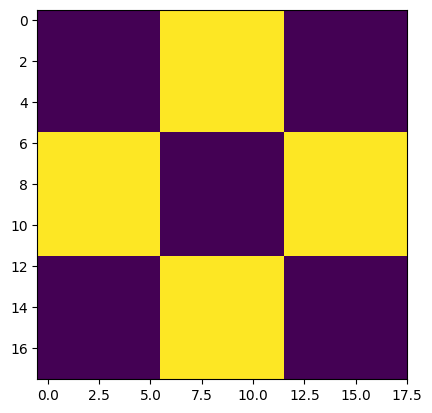

In [11]:
# Display image

plt.imshow(cb_img)

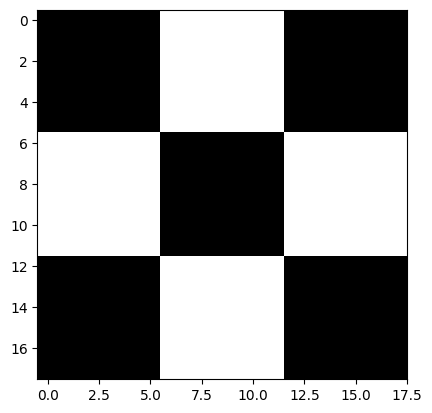

In [13]:
# Set the color map to gray-scale
plt.imshow(cb_img,cmap='gray')

# **Working with color images**

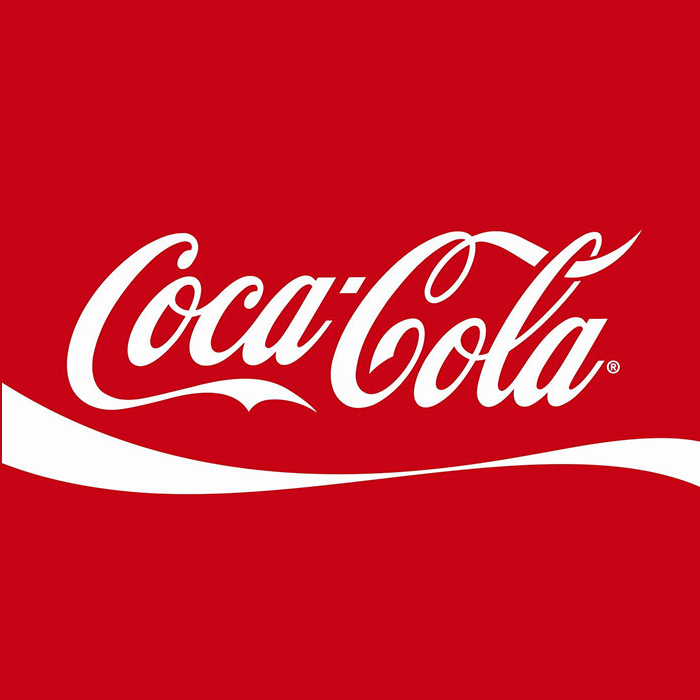

In [15]:
Image("/content/drive/MyDrive/Colab Notebooks/Open CV and AI/coca-cola-logo.png")

In [21]:
coke_img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Open CV and AI/coca-cola-logo.png",1)
print("The size of image is",coke_img.shape)
print("The shape of the image is",coke_img.dtype)

The size of image is (700, 700, 3)
The shape of the image is uint8


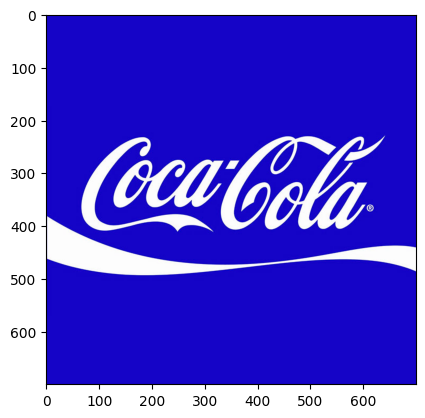

In [22]:
plt.imshow(coke_img)

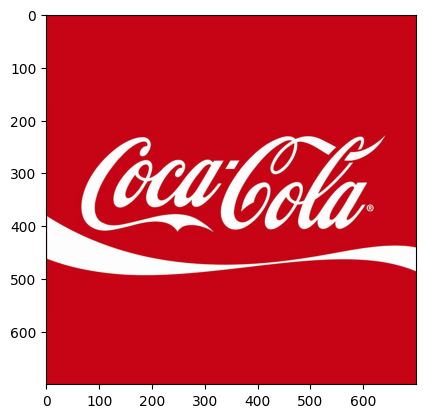

In [23]:
coke_img_channels_reversed = coke_img[:,:,::-1]
plt.imshow(coke_img_channels_reversed)

# **Splittings and Merging Color Channels**

*   cv2.split() --> Divides multi-channel array into several single-channel arrays.
*   cv2.merge() --> Merges several arrays to make a single multi-channel array/ All input matrices have same size



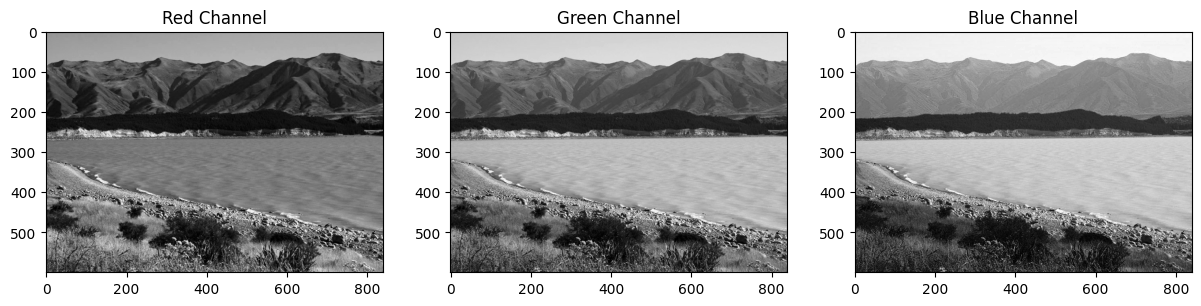

In [30]:
# Split the image into B,G,R components
img_NZ_bgr = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Open CV and AI/New_Zealand_Lake.jpg",1)
b,g,r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

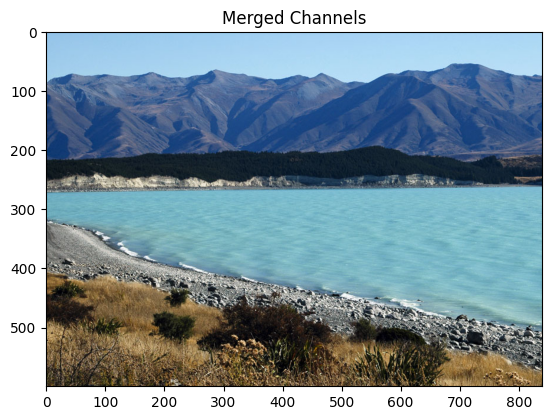

In [33]:
# Merge the channels into BGR image
imgMerged = cv2.merge((b,g,r))
plt.plot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Channels");

# **Converting to different color spaces**
cv2.cvtColor() Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

Function Syntax
dst = cv2.cvtColor( src, code )
dst: Is the output image of the same size and depth as src.

The function has 2 required arguments:

**src** input image: 8-bit unsigned,

*  **src** input image: 8-bit unsigned,16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
*  **code** color space conversion code (see ColorConversionCodes).





**Changing from BGR to RGB**

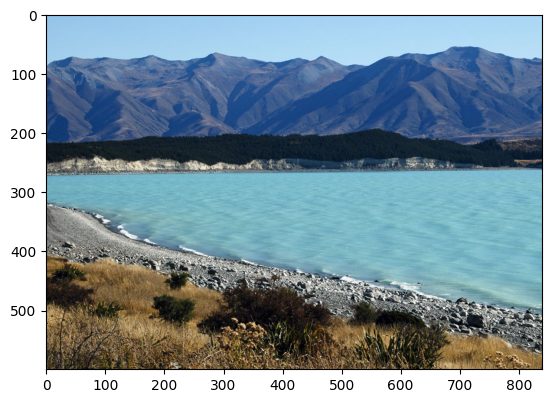

In [35]:
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

**Changing to HSV color space**

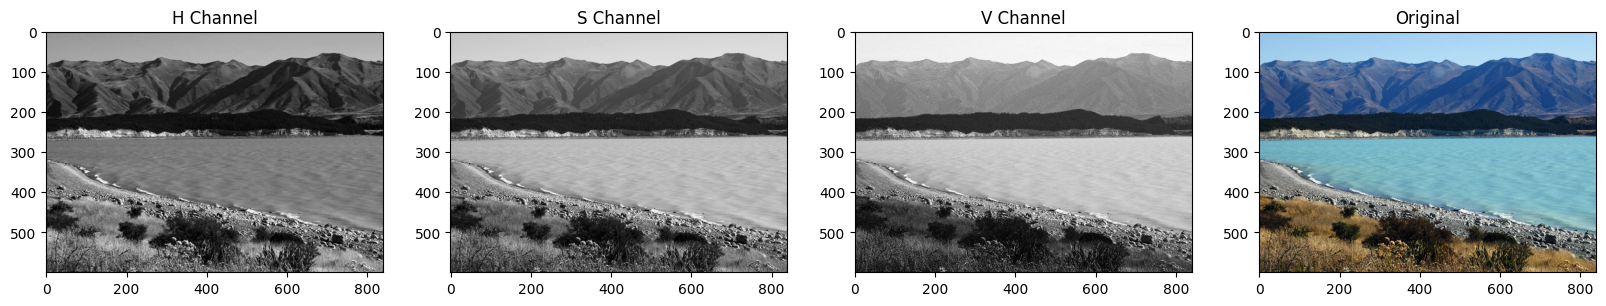

In [37]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");

# **Saving Image**

Saving the image is as trivial as reading an image in OpenCV. We use the function cv2.imwrite() with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

Function Syntax
cv2.imwrite( filename, img[, params] )
The function has 2 required arguments:


*   **filename**: This can be an absolute or relative path.
*   **img**: Image or Images to be saved.


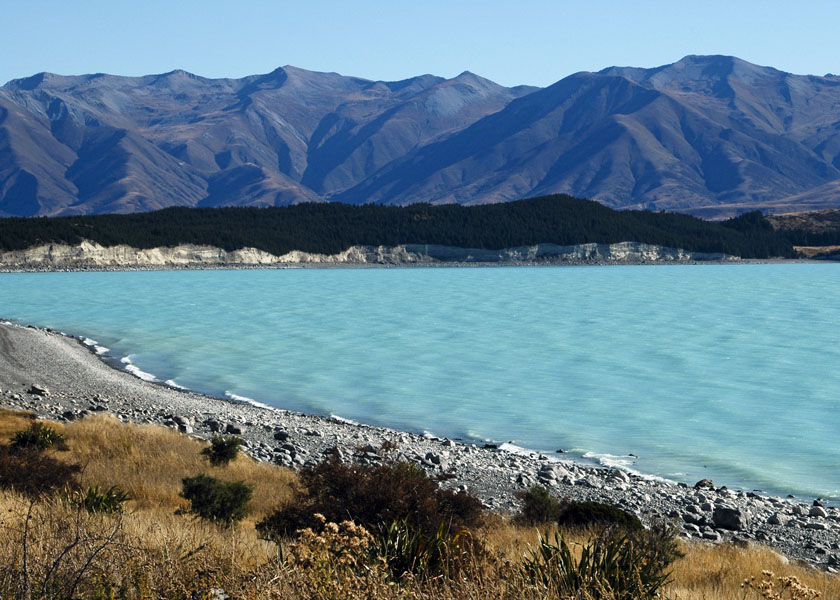

In [38]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png')

In [39]:
# read the image as Color
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape is: ", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape is: ", img_NZ_gry.shape)

img_NZ_bgr shape is:  (600, 840, 3)
img_NZ_gry shape is:  (600, 840)
